In [0]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 33.2MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


## Data Downloading

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls 'drive/My Drive'

'555timer main.gdoc'  'Resume (3).pdf'
'Colab Notebooks'      Resume.gdoc
 COVIDdata.zip	      'Resume inter.pdf'
 covidmodels.zip      'Resume - Mohit Chandra.pdf'
 CV.pdf		       Resume_Mohit.pdf
 kkp_mri.iso	       Resume.pdf
 mohitcv.pdf	       VenkataMohitSaiChandra_2016UGEC008.pdf
 output_2.pdf	       VMSChandra_Kukunoori_09022020.pdf
'Resume (1).pdf'      'Warranty claim form_.docx'
'Resume (2).pdf'      'Warranty claim form_.gdoc'


In [0]:
!cp 'drive/My Drive/COVIDdata.zip' ../content

In [0]:
!unzip -q COVIDdata.zip

## Data Preprocessing and Loading to a DataBunch

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 32
np.random.seed(42)
PATH = 'data'
tfms = zoom_crop(scale=(1,1), do_rand=False)

In [0]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, size=224)

In [0]:
data.c

3

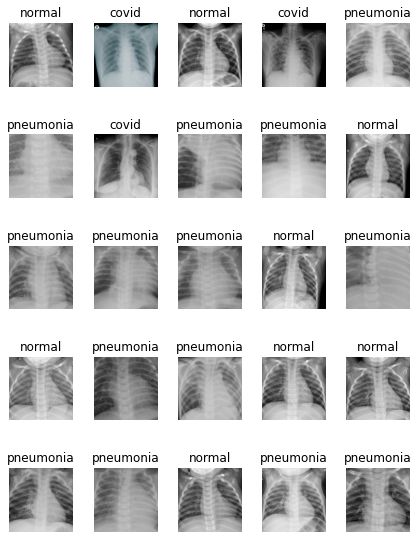

In [0]:
data.show_batch(rows=5,figsize=(6,8))

## Using Resnet34 architecture with Tranfer Learning Technique

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=[error_rate])

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.887875,2.139616,0.294785,01:39
1,0.487946,3.081764,0.419501,01:39
2,0.290711,0.771621,0.185941,01:39
3,0.194473,0.240199,0.072562,01:37


### Model Interpretation

In [0]:
def interpret_model(learn):
  interp = ClassificationInterpretation.from_learner(learn)
  interp.plot_confusion_matrix(figsize=(4,4), dpi=100)
  interp.plot_top_losses(4, figsize=(15,11))

In [0]:
learn.save('freeze-1')
#learn.load('freeze-1')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


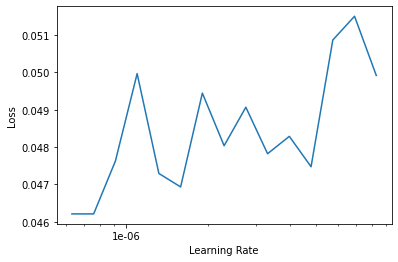

In [0]:
learn.recorder.plot()

### Unfreezing model

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(6e-7 , 1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.073591,0.212468,0.058957,01:40
1,0.059654,0.207233,0.065760,01:38


In [0]:
learn.fit_one_cycle(2, max_lr=7e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.068738,0.209807,0.063492,01:39
1,0.057802,0.205082,0.056689,01:38


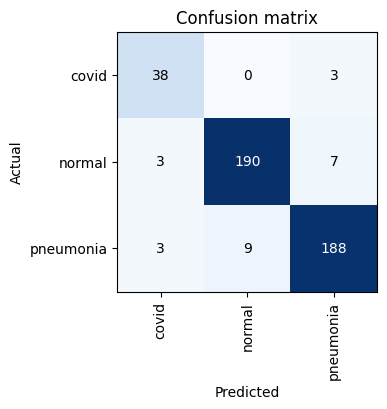

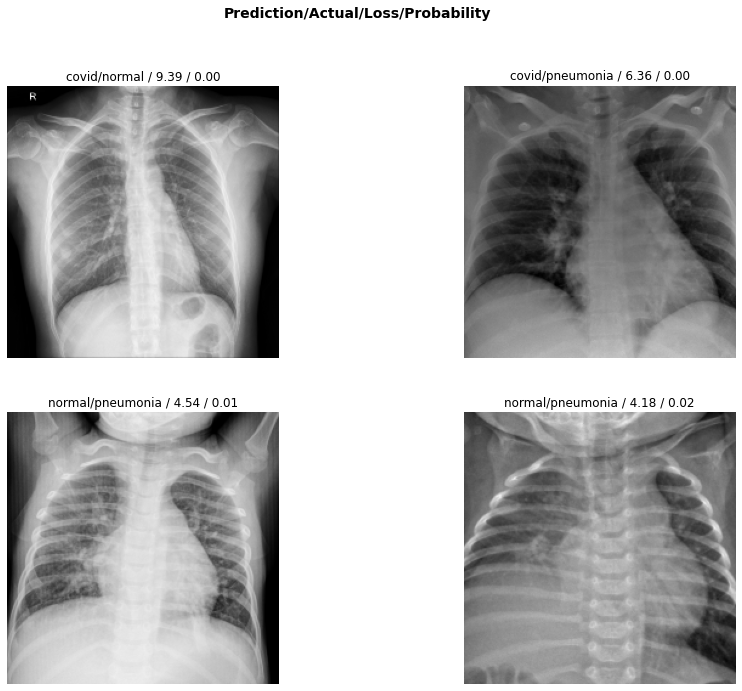

In [0]:
interpret_model(learn)

In [0]:
learn.save('unfreeze-1')